In [1]:
import csv
import gzip
import json
import seaborn as sns
import altair as alt
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [38]:
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
with open('../data/parrainages.json') as f:
    parrainages = json.load(f)

In [3]:
parrainages[0]

{'Civilite': 'M.',
 'Nom': 'CORDIVAL',
 'Prenom': 'Gilles',
 'Mandat': 'Maire',
 'Circonscription': 'Mont-Saint-Père',
 'Departement': 'Aisne',
 'Candidat': 'ARTHAUD Nathalie',
 'DatePublication': '2022-02-01T00:00:00'}

In [4]:
candidates = Counter(p['Candidat'] for p in parrainages)

In [5]:
keep = set(c for c, p in candidates.items() if p >= 500)
keep

{'ARTHAUD Nathalie',
 'DUPONT-AIGNAN Nicolas',
 'HIDALGO Anne',
 'JADOT Yannick',
 'LASSALLE Jean',
 'LE PEN Marine',
 'MACRON Emmanuel',
 'MÉLENCHON Jean-Luc',
 'POUTOU Philippe',
 'PÉCRESSE Valérie',
 'ROUSSEL Fabien',
 'ZEMMOUR Éric'}

In [6]:
filtered_parrainages = [p for p in parrainages if p['Candidat'] in keep]

In [7]:
len(filtered_parrainages), len(parrainages)

(12195, 13427)

In [8]:
Counter(p['Mandat'] for p in parrainages if 'maire' in p['Mandat'].lower()).most_common()

[('Maire', 8712),
 ("Maire délégué d'une commune associée ou d'une commune déléguée", 345),
 ("Maire déléguée d'une commune associée ou d'une commune déléguée", 123),
 ("Maire d'arrondissement", 27)]

In [9]:
df = pd.DataFrame(filtered_parrainages)
df['date'] = pd.to_datetime(df['DatePublication'])
df

,Civilite,Nom,Prenom,Mandat,Circonscription,Departement,Candidat,DatePublication,date
0,M.,CORDIVAL,Gilles,Maire,Mont-Saint-Père,Aisne,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01
1,Mme,VALLIET,Odile,Maire,Crupilly,Aisne,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01
2,M.,GUEYRAUD,Jean-Marie,Maire,Saint-Auban-d'Oze,Hautes-Alpes,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01
3,Mme,NOUVEL,Marie-Claude,Maire,Seignalens,Aude,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01
4,M.,GAINCHE,Jean-Paul,Maire,Langrolay-sur-Rance,Côtes-d'Armor,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01
...,...,...,...,...,...,...,...,...,...
12190,M.,BONNEVILLE,Alain,Maire,Vouxey,Vosges,ZEMMOUR Éric,2022-03-07T00:00:00,2022-03-07
12191,M.,PEDUZZI,Dominique,Conseiller départemental,,Vosges,ZEMMOUR Éric,2022-03-07T00:00:00,2022-03-07
12192,M.,TEHAAMOANA,Etienne,Membre d'une assemblée d'une collectivité terr...,,Polynésie française,ZEMMOUR Éric,2022-03-07T00:00:00,2022-03-07
12193,Mme,GIRAUD-MALIVEL,Michèle,Présidente du conseil consulaire,"Maurice, Seychelles",Français de l'étranger,ZEMMOUR Éric,2022-03-07T00:00:00,2022-03-07


<AxesSubplot:xlabel='Civilite', ylabel='Count'>

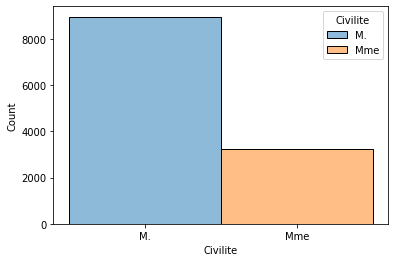

In [10]:
sns.histplot(data=df, x='Civilite', hue='Civilite')

In [39]:
alt.Chart(df, width=200).mark_bar().encode(
    x='Civilite:N',
    y='count()',
    color='Civilite:N'
)

alt.Chart(...)

In [40]:
alt.Chart(df).mark_arc().encode(
    theta='count()',
    color='Civilite:N'
)

alt.Chart(...)

In [13]:
df.groupby(['Candidat', 'date']).count()

Civilite  Nom  Prenom  Mandat  Circonscription  \
Candidat         date                                                         
ARTHAUD Nathalie 2022-02-01        12   12      12      12               12   
                 2022-02-03       126  126     126     126              126   
                 2022-02-08       230  230     230     230              230   
                 2022-02-10        51   51      51      51               51   
                 2022-02-15        90   90      90      90               90   
...                               ...  ...     ...     ...              ...   
ZEMMOUR Éric     2022-02-22        59   59      59      59               59   
                 2022-02-24        65   65      65      65               65   
                 2022-03-01       205  205     205     205              205   
                 2022-03-03       101  101     101     101              101   
                 2022-03-07        20   20      20      20               20   

                             Departement  DatePublication  
Candidat         date                                      
ARTHAUD Nathalie 2022-02-01           12               12  
                 2022-02-03          126              126  
                 2022-02-08          230              230  
                 2022-02-10           51               51  
                 2022-02-15           90               90  
...                                  ...              ...  
ZEMMOUR Éric     2022-02-22           59               59  
                 2022-02-24           65               65  
                 2022-03-01          205              205  
                 2022-03-03          101              101  
                 2022-03-07           20               20  

[132 rows x 7 columns]

In [14]:
df[['Candidat', 'date']].value_counts().reset_index(name='count')

,Candidat,date,count
0,PÉCRESSE Valérie,2022-02-08,615
1,PÉCRESSE Valérie,2022-02-15,575
2,MACRON Emmanuel,2022-02-03,424
3,MACRON Emmanuel,2022-02-08,397
4,HIDALGO Anne,2022-02-08,386
...,...,...,...
127,ROUSSEL Fabien,2022-03-03,6
128,POUTOU Philippe,2022-02-01,4
129,ARTHAUD Nathalie,2022-02-24,3
130,LE PEN Marine,2022-02-01,2


<AxesSubplot:xlabel='date', ylabel='Nom'>

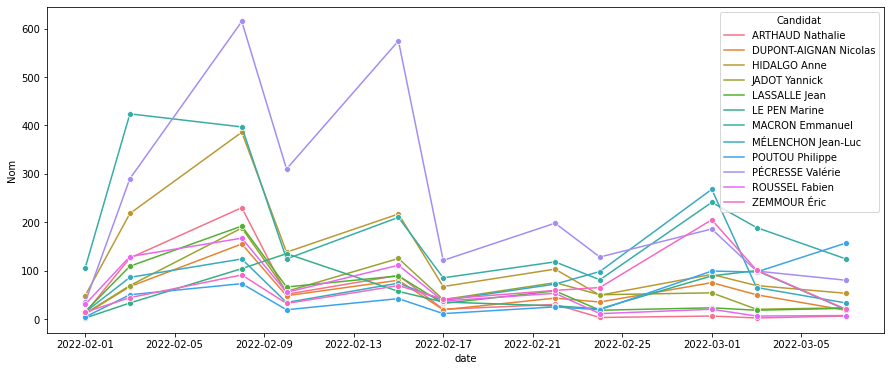

In [15]:
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df.groupby(['Candidat', 'date']).count(), x='date', y='Nom', hue='Candidat', marker='o')

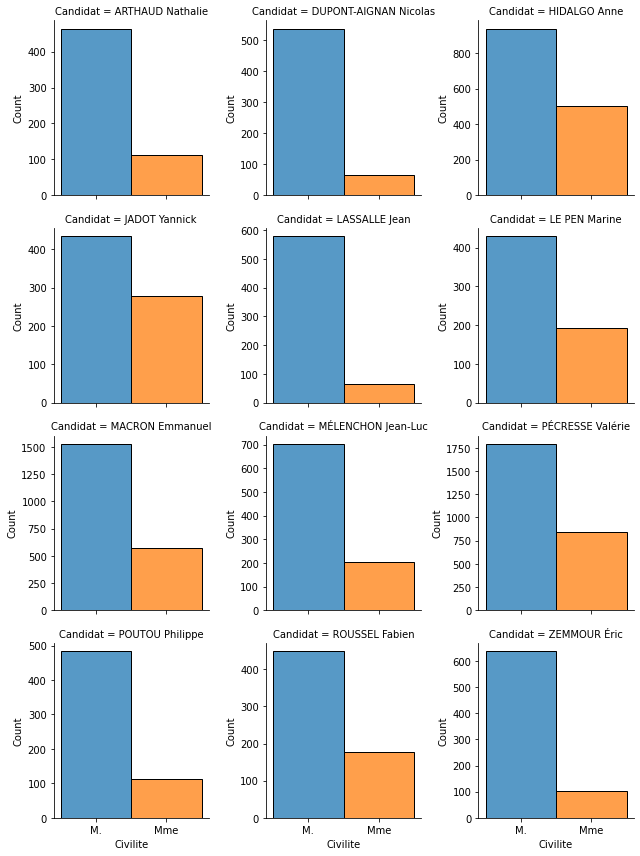

In [16]:
g = sns.FacetGrid(df, col="Candidat", col_wrap=3, sharey=False, hue="Civilite")
g.map(sns.histplot, "Civilite")

In [17]:
def mayor_key(name, surname, dept):
    return (name.lower(), surname.lower(), dept.lower())

In [18]:
index_mayors = set(mayor_key(row['Nom'], row['Prenom'], row['Departement']) for row in filtered_parrainages if 'maire' in row['Mandat'].lower())

In [19]:
len(index_mayors)

8116

In [20]:
list(index_mayors)[:10]

[('vicaire bonnieu', 'delphine', 'dordogne'),
 ('dubosclard', 'thierry-jean pierre', 'creuse'),
 ('muller', 'richard', 'meuse'),
 ('guillaucourt', 'jack', 'aisne'),
 ('demarcq eguiguren', 'solange', 'pyrénées-atlantiques'),
 ('porteix', 'yves', 'pyrénées-orientales'),
 ('lecaque', 'vincent', 'haute-savoie'),
 ('lepeltier', 'patrick', 'manche'),
 ('varin', 'dominique', 'calvados'),
 ('ecenarro', 'kotte', 'pyrénées-atlantiques')]

In [21]:
with open('../data/rne-maires.csv', encoding='latin1') as f:
    RNE = list(csv.DictReader(f, delimiter=';'))

In [22]:
RNE[0]

{'Code du département': '01',
 'Libellé du département': 'Ain',
 'Code de la collectivité à statut particulier': '',
 'Libellé de la collectivité à statut particulier': '',
 'Code de la commune': '01001',
 'Libellé de la commune': "L'Abergement-Clémenciat",
 "Nom de l'élu": 'BOULON',
 "Prénom de l'élu": 'Daniel',
 'Code sexe': 'M',
 'Date de naissance': '04/03/1951',
 'Code de la catégorie socio-professionnelle': '74',
 'Libellé de la catégorie socio-professionnelle': 'Ancien cadre',
 'Date de début du mandat': '18/05/2020',
 'Date de début de la fonction': '26/05/2020'}

In [23]:
with gzip.open('../data/municipale2020.csv.gz', 'rt') as f:
    candidatures = list(tqdm(csv.DictReader(f), total=902494))

  0%|          | 0/902494 [00:00<?, ?it/s]

In [24]:
candidatures[0]

{'Code du département': '01',
 'Libellé du département': 'Ain',
 'Code commune': '01004',
 'Libellé commune': 'Ambérieu-en-Bugey',
 'N° Panneau Liste': '1',
 'Libellé abrégé liste': 'UNIS POUR AMBERIEU',
 'Libellé Etendu Liste': 'UNIS POUR AMBERIEU',
 'Nuance Liste': 'LDVC',
 'N° candidat': '1',
 'Sexe candidat': 'M',
 'Nom candidat': 'FABRE',
 'Prénom candidat': 'Daniel',
 'Nationalité': 'Française',
 'Candidat au conseil communautaire': 'O'}

In [25]:
matches_rne = {}
for row in RNE:
    k = mayor_key(row["Nom de l'élu"], row["Prénom de l'élu"], row['Libellé du département'])
    if k in index_mayors:
        matches_rne[k] = row
        
len(matches_rne), len(matches_rne) / len(index_mayors)

(7621, 0.939009364218827)

In [26]:
matches_candidatures = {}
for row in candidatures:
    k = mayor_key(row["Nom candidat"], row["Prénom candidat"], row['Libellé du département'])
    if k in index_mayors:
        matches_candidatures[k] = row
        
len(matches_candidatures), len(matches_candidatures) / len(index_mayors)

(7890, 0.9721537703302119)

In [27]:
Counter(row['Nuance Liste'] for row in matches_candidatures.values())

Counter({'': 6462,
         'LDVD': 379,
         'LUG': 94,
         'LDVG': 335,
         'LDVC': 143,
         'LSOC': 68,
         'LRN': 9,
         'LLR': 131,
         'LCOM': 40,
         'LUD': 34,
         'LUDI': 16,
         'LDIV': 126,
         'LECO': 5,
         'LFI': 1,
         'LREM': 13,
         'LMDM': 3,
         'LVEC': 15,
         'LUC': 10,
         'LEXD': 4,
         'LREG': 2})

In [28]:
homonymies = Counter(mayor_key(row["Nom de l'élu"], row["Prénom de l'élu"], row['Libellé du département']) for row in RNE)
homonymies.most_common(10)

[(('comtet', 'laurent', 'ain'), 2),
 (('perret', 'bernard', 'ain'), 2),
 (('lemoine', 'philippe', 'aisne'), 2),
 (('lemaire', 'michel', 'aisne'), 2),
 (('laffont', 'patrick', 'ariège'), 2),
 (('pottier', 'david', 'calvados'), 2),
 (('mage', 'jean', 'cantal'), 2),
 (('fournier', 'christian', 'cantal'), 2),
 (('pelletier', 'michel', 'charente-maritime'), 2),
 (('petit', 'christophe', 'corrèze'), 2)]

In [29]:
homonymies = Counter(mayor_key(row["Nom candidat"], row["Prénom candidat"], row['Libellé du département']) for row in candidatures)
homonymies.most_common(10)

[(('muller', 'daniel', 'moselle'), 5),
 (('petit', 'isabelle', 'pas-de-calais'), 5),
 (('weber', 'pierre', 'bas-rhin'), 5),
 (('schmitt', 'michel', 'bas-rhin'), 5),
 (('meyer', 'frédéric', 'bas-rhin'), 5),
 (('lefevre', 'philippe', 'aisne'), 4),
 (('marie', 'alain', 'calvados'), 4),
 (('marie', 'catherine', 'calvados'), 4),
 (('briand', 'yvon', "côtes-d'armor"), 4),
 (('muller', 'christophe', 'moselle'), 4)]

In [30]:
df['pol'] = df.apply(lambda row: matches_candidatures.get(mayor_key(row['Nom'], row['Prenom'], row['Departement']), {}).get('Nuance Liste') or None, axis=1)

In [31]:
df

,Civilite,Nom,Prenom,Mandat,Circonscription,Departement,Candidat,DatePublication,date,pol
0,M.,CORDIVAL,Gilles,Maire,Mont-Saint-Père,Aisne,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01,None
1,Mme,VALLIET,Odile,Maire,Crupilly,Aisne,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01,None
2,M.,GUEYRAUD,Jean-Marie,Maire,Saint-Auban-d'Oze,Hautes-Alpes,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01,None
3,Mme,NOUVEL,Marie-Claude,Maire,Seignalens,Aude,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01,None
4,M.,GAINCHE,Jean-Paul,Maire,Langrolay-sur-Rance,Côtes-d'Armor,ARTHAUD Nathalie,2022-02-01T00:00:00,2022-02-01,None
...,...,...,...,...,...,...,...,...,...,...
12190,M.,BONNEVILLE,Alain,Maire,Vouxey,Vosges,ZEMMOUR Éric,2022-03-07T00:00:00,2022-03-07,None
12191,M.,PEDUZZI,Dominique,Conseiller départemental,,Vosges,ZEMMOUR Éric,2022-03-07T00:00:00,2022-03-07,None
12192,M.,TEHAAMOANA,Etienne,Membre d'une assemblée d'une collectivité terr...,,Polynésie française,ZEMMOUR Éric,2022-03-07T00:00:00,2022-03-07,None
12193,Mme,GIRAUD-MALIVEL,Michèle,Présidente du conseil consulaire,"Maurice, Seychelles",Français de l'étranger,ZEMMOUR Éric,2022-03-07T00:00:00,2022-03-07,None


In [32]:
df.pol.value_counts()

LDVD    379
LDVG    335
LDVC    143
LLR     131
LDIV    126
LUG      94
LSOC     68
LCOM     40
LUD      34
LUDI     16
LVEC     15
LREM     13
LUC      10
LRN       9
LECO      5
LEXD      4
LMDM      3
LREG      2
LFI       1
Name: pol, dtype: int64

In [33]:
def gauche_ou_droite(pol):
    if not pol:
        return None
    
    if pol == 'LDVD':
        return 'droite'
    
    if pol == 'LDVG':
        return 'gauche'
    
    if pol == 'LDVC':
        return 'centre'
    
    return None

In [34]:
df['bord'] = df.pol.apply(gauche_ou_droite)

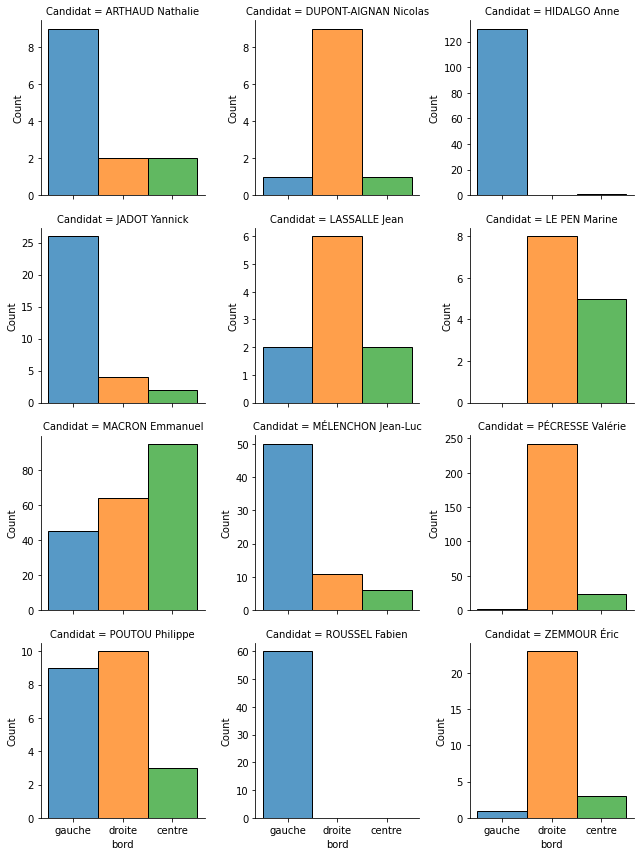

In [35]:
g = sns.FacetGrid(df, col="Candidat", col_wrap=3, sharey=False, hue="bord")
g.map(sns.histplot, "bord")

In [36]:
df['prof'] = df.apply(lambda row: matches_rne.get(mayor_key(row['Nom'], row['Prenom'], row['Departement']), {}).get('Libellé de la catégorie socio-professionnelle') or None, axis=1)

In [37]:
df.prof.value_counts()

Ancien cadre                                                                         1299
Cadre de la fonction publique                                                         517
Ancien employé                                                                        482
Agriculteur sur moyenne exploitation                                                  455
Cadre administratif et commercial d'entreprise                                        414
Ancien agriculteur exploitant                                                         369
Ancien artisan, commerçant, chef d'entreprise                                         341
Profession libérale                                                                   339
Professeur, profession scientifique                                                   339
Ancienne profession intermédiaire                                                     333
Ingénieur et cadre technique d'entreprise                                             272
Technicien